In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [151]:
# system params
delta_t = 0.01
time = 1
v_0 = np.array([[1, -1, 0]])
a = np.array([[0, 0, 0]])
n = 100

# get noisy data
t = np.linspace(0, 10, n)
t_batch = np.repeat(np.array([t]).T, 3, 1)
print(t.shape)
#x = v_0*t-(9.8/2)*(t**2) + np.random.normal(scale=0.05, size=n)
pos_samples = v_0*t_batch + np.random.normal(scale=0.008, size=(n, 3))
x_samples = pos_samples[:, 0]
y_samples = pos_samples[:, 1]
z_samples = pos_samples[:, 2]
ax = plt.axes(projection='3d')
ax.scatter3D(x_samples, y_samples, z_samples, c='r', cmap='Greens', s=0.1)
plt.clf()



(100,)


<Figure size 640x480 with 0 Axes>

In [152]:
def fit(t, a, b):
    return a*t+b

def fit_pos(t, pos_samples):
    paramx, covx = curve_fit(fit, t, x_samples)
    paramy, covy = curve_fit(fit, t, y_samples)
    return [paramx, paramy]

def xy_intercept(v, x_thresh):
    a, b = v[0]
    b -= x_thresh
    t_int = np.roots([a, b])
    print("roots", t_int)
    return fit(t_int[0], *v[0]), fit(t_int[0], *v[1])


a_xy = 0
a_z = -9.8
params = fit_pos(t, pos_samples)
paramx, paramy = params
print(paramx, paramy)

[0.99964417 0.00187214] [-0.99975224 -0.00199373]


roots [0.99848315]
x int y int 1.0 -1.0002295016615783


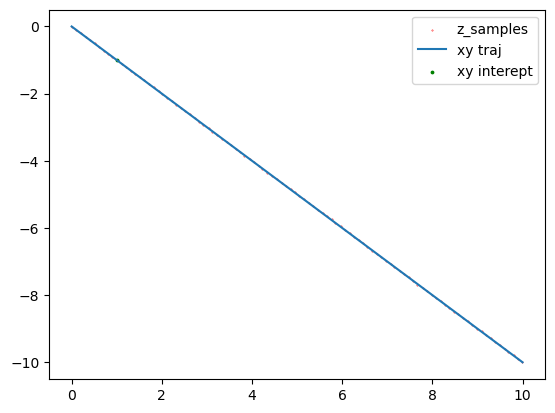

In [153]:
x_thresh = 1
x_int, y_int = xy_intercept(params, x_thresh)
print("x int y int", x_int, y_int)
plt.scatter(x_samples, y_samples, c='r', s=0.1, label="z_samples")
plt.plot(fit(t, *paramx), fit(t, *paramy), label='xy traj')
plt.scatter(x_int, y_int, label="xy interept", s=3, c='g')
plt.legend()
plt.show()

roots [0.99940855]
1.0 -0.9985648352475153


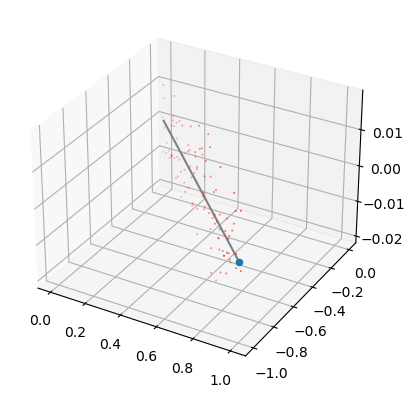

In [150]:
x_thresh = 1
x_int, y_int = xy_intercept(params, x_thresh)
print(x_int, y_int)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x, y, z = fit(t, *paramx), fit(t, *paramy), np.zeros(t.shape)
ax.plot3D(x, y, z, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(x_samples, y_samples, z_samples, c='r', cmap='Greens', s=0.1)
ax.scatter3D(x_int, y_int, 0)